# Les naufragés du Titanic

L'objectif de ce TP est d'introduire de manière pratique quelques notions qui seront détaillées lors du cours de *Données Intelligentes*.

Ce TP fait suite à celui de première année du cours d'UED (Utilisation et Exploitation de Données) portant sur le même jeu de données.
Une première partie, optionnelle, sert de rappel ou de mise à niveau accélérée sur les notebooks, Python, [pandas](https://pandas.pydata.org/) et les données manipulées par la suite.

## Rendu et organisation

Le compte-rendu du TP prendra la forme d'un notebook Jupyter, soit en complétant celui-ci, soit en en créant un nouveau. Ce notebook doit inclure à la fois vos codes python de traitement, les résultats de leurs exécutions, ainsi que vos analyses et réflexions **rédigées** dans des cellules Markdown.  
Votre notebook doit pouvoir être ré-exécuté intégralement et **séquentiellement**. Assurez vous que ce soit bien le cas avant de le rendre.  
La date limite de dépôt du notebook (au format ipynb) sur moodle est fixée au 11 février 2022.

Comme le cours associé n'a pas encore eu lieu, l'évaluation de ce TP portera sur :

- votre implication dans le travail réalisé (principalement en séance, mais aussi en dehors si nécessaire),
- le soin apporté à votre compte-rendu,
- votre compréhension et la restitution dans le compte-rendu des informations que vous aurez pu assimiler lors de la séance, que ce soit en lisant de la documentation en ligne ou en interrogeant votre encadrant.

# Rappels : description des données

Les données support de ce TP sont les listes des passagers et membres d'équipage présents à bord du Titanic au moment de son naufrage. Ces données, réelles, sont parfois incomplètes, incertaines, voire fausses. Elles sont issues de la fusion de plusieurs sources, dont les trois principales sont :

- [Un jeu de données consolidé par l'université Vanderbilt](https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic.html)
- Wikipedia ([passagers](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) et [équipage](https://en.wikipedia.org/wiki/Crew_of_the_RMS_Titanic))
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org)


## Passagers

Le fichier `passengers.csv` contient la liste des passagers à bord du Titanic.

Les informations de ce fichier sont les suivantes :

- **class** : classe de la réservation (1re, 2e ou 3e)
- **survived** : si le passager à survécu (1 = oui, 0 = non)
- **title** : titre
- **surname** : nom de famille
- **first name** : prénom(s) &ndash; pour les femmes mariées le prénom du mari est indiqué, puis les prénoms et nom de jeune fille sont donnés entre parenthèses
- **sex** : sexe
- **age** : âge au moment du naufrage &ndash; pour les passagers de moins d'un an, l'âge est donné en proportion d'une année (réel entre 0 et 1)
- **birthday** : date de naissance
- **nationality** : nationalité
- **sibsp** : nombre de frères, sœurs ou époux à bord
- **parch** : nombre de parents ou enfants à bord
- **ticket** : numéro de réservation
- **fare** : prix total de la traversée en livre sterling, pour l'ensemble des passagers concernés par la réservation
- **cabin** : cabine &ndash; identifiant du pont (lettre entre A et G, du haut vers le bas) suivi du numéro de cabine ; si plusieurs cabines sont réservées, celles-ci sont séparées par des espaces ; les cabines spéciales du pont supérieur sont identifiées par une lettre entre T et Z
- **boarded** : port d'embarquement (dans l'ordre chronologique : B = Belfast, Royaume-Uni ; S = Southampton, Royaume-Uni ; C = Cherbourg, France ; Q = Queenstown, Irlande)
- **lifeboat** : identifiant du premier canot de sauvetage utilisé &ndash; certains passagers ont dû changer de canot après le naufrage
- **body** : numéro d'identification du corps retrouvé
- **home.dest** : lieu de résidence / destination

## Équipage

Le fichier `crew.csv` contient la liste des membres d'équipage du Titanic.

Les informations de ce fichier sont les suivantes :

- **survived** : si le membre d'équipage à survécu (1 = oui, 0 = non)
- **title** : titre
- **surname** : nom de famille
- **first name** : prénom(s) &ndash; pour les femmes mariées le prénom du mari est indiqué, puis les prénoms et nom de jeune fille sont donnés entre parenthèses
- **sex** : sexe
- **age** : âge au moment du naufrage
- **department** : secteur de travail, repris des [catégories données sur Wikipedia](https://en.wikipedia.org/wiki/Crew_of_the_RMS_Titanic)
- **position** : intitulé du poste occupé
- **boarded** : port d'embarquement (dans l'ordre chronologique : B = Belfast, Royaume-Uni ; S = Southampton, Royaume-Uni)
- **lifeboat** : identifiant du premier canot de sauvetage utilisé &ndash; certains membres d'équipage ont dû changer de canot après le naufrage
- **body** : numéro d'identification du corps retrouvé
- **home** : lieu de résidence

## Canots de sauvetage

Le fichier `lifeboats.csv` contient la liste des canots de sauvetages.

Les informations de ce fichier sont les suivantes :

- **lifeboat** : identifiant du canot
- **side** : coté d'attache du canot (port = bâbord, starboard = tribord)
- **launched** : heure de mise à l'eau &ndash; les canots A et B n'ont pas été mis à l'eau mais ont flotté suite au naufrage
- **recovered** : heure de récupération du canot par le RMS Carpathia
- **capacity** : capacité maximale, en nombre de passagers

## Dépendances

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

## Import des données

Il existe plusieurs [constructeurs de DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Dans notre cas, nous allons chercher à importer les données depuis des fichiers csv à l'aide de la fonction [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv).

L'exemple de la cellule suivante importe les données du fichier `passengers.csv`. Cette méthode comporte de nombreuses options, dont `parse_dates` qui permet d'expliciter la conversion du contenu d'une colonne en dates.

In [2]:
passengers = pd.read_csv('passengers.csv', parse_dates=['birthday'])

# Rappels : analyse exploratoire

Une DataFrame pandas est, conceptuellement, un tableau à deux dimensions, avec une notion de *schéma commun*, c'est à dire que toutes les lignes présentent des informations décrites de manière homogène : elles possèdent toutes les mêmes informations (colonnes) et deux informations d'une même colonne sont représentées avec le même type.
Avec le vocabulaire utilisé en analyse statistique, les colonnes correspondent aux *variables* et les lignes aux *observations*.

Les intitulés et l'ordre des colonnes sont accessibles depuis l'attribut `columns` tandis que les types sont décrits par l'attribut `dtypes`.

In [4]:
passengers.columns

Index(['class', 'survived', 'title', 'surname', 'first name', 'sex', 'age',
       'birthday', 'nationality', 'sibsp', 'parch', 'ticket', 'fare', 'cabin',
       'boarded', 'lifeboat', 'body', 'home.dest'],
      dtype='object')

In [5]:
passengers.dtypes

class                   int64
survived                int64
title                  object
surname                object
first name             object
sex                    object
age                   float64
birthday       datetime64[ns]
nationality            object
sibsp                   int64
parch                   int64
ticket                 object
fare                  float64
cabin                  object
boarded                object
lifeboat               object
body                  float64
home.dest              object
dtype: object

Les types gérés nativement sont :

- les valeurs numériques entières, réelles ou complexes,
- les dates,
- les booléens,
- les chaînes de caractères de taille fixe.

Toutes les autres représentations (en particulier les chaînes de caractères de taille variable) prennent la forme d'un objet Python.

### Consultation

Par défaut, la consultation du contenu d'une DataFrame volumineuse n'en présente qu'un extrait (les cinq premières et les cinq dernières lignes).

In [6]:
passengers

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC"
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.650,E67,S,NaN,NaN,"New York, NY"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1313,3,0,Mr.,Ford,Edward Watson,male,18.0,NaT,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1315,3,0,Mr.,Ford,William Neal,male,16.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


Les fonctions [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) et [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail) servent à extraire les premières ou dernières lignes.

In [0]:
passengers.head(10)

**Q1** Importer et visualiser le contenu du fichier correspondant aux membres d'équipage

In [6]:
crew = pd.read_csv('crew.csv')
crew.columns

Index(['survived', 'title', 'surname', 'first name', 'sex', 'age',
       'department', 'position', 'boarded', 'lifeboat', 'body', 'home'],
      dtype='object')

In [16]:
crew.dtypes

survived        int64
title          object
surname        object
first name     object
sex            object
age           float64
department     object
position       object
boarded        object
lifeboat       object
body          float64
home           object
dtype: object

In [17]:
crew

,survived,title,surname,first name,sex,age,department,position,boarded,lifeboat,body,home
0,1,Mr.,Anderson,James,male,40.0,Deck,Able Seaman,S,16,NaN,"Southampton, Hampshire, England"
1,1,Mr.,Anderson,John,male,41.0,Deck,Able Seaman,S,16,NaN,"Southampton, Hampshire, England"
2,1,Mr.,Archer,Ernest,male,36.0,Deck,Able Seaman,S,3,NaN,"Southampton, Hampshire, England"
3,1,Mr.,Bailey,Joseph,male,43.0,Deck,Master-at-arms,S,16,NaN,"Southampton, Hampshire, England"
4,0,Mr.,Bradley,T.,male,29.0,Deck,Able Seaman,S,NaN,NaN,"Southampton, Hampshire, England"
...,...,...,...,...,...,...,...,...,...,...,...,...
844,0,Mr.,Wormald,Frederick,male,36.0,Victualling,First Class Saloon Steward,S,NaN,144.0,"Southampton, Hampshire, England"
845,0,Mr.,Wrapson,Frederick,male,19.0,Victualling,Asst. Pantryman,S,NaN,NaN,"Southampton, Hampshire, England"
846,0,Mr.,Wright,Frederick,male,24.0,Victualling,Squash Court Steward,S,NaN,NaN,"London, England"
847,1,Mr.,Wright,William,male,40.0,Victualling,Glory Hole Steward,S,13,NaN,"Southampton, Hampshire, England"


## Accès et recherche dans une DataFrame

Trois types de filtres sont utilisés pour accéder à une ou plusieurs lignes précises d'une DataFrame :

- des valeurs ou des plages d'index (`loc`),
- des valeurs ou des plages de positions (`iloc`),
- des tableaux de booléens.

### Accès par valeur d'index ou par position

Lors de la visualisation des DataFrames, vous avez dû remarquer que la première colonne (sans intitulé) correspond à une valeur numérique qui n'est pas présente dans les fichiers csv originaux. Cette colonne est l'index de la DataFrame, qui sert d'identifiant unique d'une ligne et qui peut être redéfini si besoin.

Avec l'index entier défini par défaut, l'accès par index (`loc`) ou par position (`iloc`) sont très similaires, mais l'index est résistant au réagancement.

In [7]:
passengers.loc[180:185]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
180,1,1,Mr.,Woolner,Hugh,male,46.0,NaT,English,0,0,19947,35.5,C52,S,D,NaN,"London, England"
181,1,1,Miss,Fortune,Alice Elizabeth,female,24.0,1887-05-10,Canadian,3,2,19950,263.0,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
182,1,0,Mr.,Fortune,Charles Alexander,male,19.0,1892-10-13,Canadian,3,2,19950,263.0,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
183,1,1,Miss,Fortune,Ethel Flora,female,28.0,1883-09-22,Canadian,3,2,19950,263.0,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
184,1,1,Miss,Fortune,Mabel Helen,female,23.0,1888-11-03,Canadian,3,2,19950,263.0,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
185,1,0,Mr.,Fortune,Mark,male,64.0,1847-11-02,Canadian,1,4,19950,263.0,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"


In [8]:
passengers.sort_values('fare', ascending=False).iloc[:10]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
294,1,1,Mrs.,Cardeza,James Warburton Martinez (Charlotte Wardle Drake),female,58.0,1854-04-10,American,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
297,1,1,Miss,Ward,Anna,female,38.0,1874-01-08,American,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
295,1,1,Mr.,Cardeza,Thomas Drake Martinez,male,36.0,1875-05-10,American,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
296,1,1,Mr.,Lesueur,Gustave J,male,35.0,NaT,French,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
181,1,1,Miss,Fortune,Alice Elizabeth,female,24.0,1887-05-10,Canadian,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
182,1,0,Mr.,Fortune,Charles Alexander,male,19.0,1892-10-13,Canadian,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
183,1,1,Miss,Fortune,Ethel Flora,female,28.0,1883-09-22,Canadian,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
184,1,1,Miss,Fortune,Mabel Helen,female,23.0,1888-11-03,Canadian,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
185,1,0,Mr.,Fortune,Mark,male,64.0,1847-11-02,Canadian,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
186,1,1,Mrs.,Fortune,Mark (Mary McDougald),female,60.0,1851-05-06,Canadian,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


### Indexation booléenne et sélection

Un tableau de booléens de la même taille (en nombre de lignes) que la DataFrame peut aussi être utilisé pour sélectionner un ensemble de lignes à conserver.

Le résultat d'une opération arithmétique ou logique sur une colonne d'une DataFrame (on parle de [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)) donne une nouvelle série contentant le résultat de l'opération appliquée à chaque valeur de la série originale.

L'exemple de la cellule suivante teste si le sexe d'un passager est féminin.

In [9]:
passengers['sex'] == 'female'

0        True
1        True
2        True
3       False
4        True
        ...  
1312     True
1313    False
1314     True
1315    False
1316     True
Name: sex, Length: 1317, dtype: bool

Ce résultat, assimilé à un tableau de booléens peut alors être injectée comme filtre sur la DataFrame originale afin de ne récupérer que les informations des passagères.

In [10]:
passengers[passengers['sex'] == 'female']

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY"
5,1,1,Miss,Taussig,Ruth,female,18.0,1893-11-25,American,0,2,110413,79.650,E68,S,8,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,3,0,Miss,Johnston,"Catherine Helen ""Carrie""",female,7.0,1905-02-19,English,1,2,W/C 6607,23.450,NaN,S,NaN,NaN,NaN
1311,3,0,Miss,Ford,"Doolina Margaret ""Daisy""",female,20.0,1891-06-13,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


Les tableaux de booléens peuvent être combinés avec les opérateurs `&` (et) et `|` (ou) afin de filtrer des valeurs sur une combinaison de critères (attention aux parenthèses, souvent nécessaires car ces deux opérateurs ont priorité sur les opérateurs de comparaison).

L'exemple de la cellule suivante recherche les passagères dont le titre n'est pas `Mrs.` et dont la date de naissance est renseignée.

In [18]:
passengers[(passengers['sex'] == 'female') & (passengers['title'] != 'Mrs.') & passengers['birthday'].notnull()]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.5000,B77,S,8,NaN,"London, England"
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.5000,B77,S,8,NaN,"London Vancouver, BC"
5,1,1,Miss,Taussig,Ruth,female,18.0,1893-11-25,American,0,2,110413,79.6500,E68,S,8,NaN,"New York, NY"
16,1,1,Miss,Hippach,Jean Gertrude,female,17.0,1894-09-30,American,0,1,111361,57.9792,B18,C,4,NaN,"Chicago, IL"
31,1,1,Miss,Gibson,Dorothy Winifred,female,22.0,1889-05-17,American,0,1,112378,59.4000,NaN,C,7,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,3,1,Miss,Heikkinen,Laina,female,16.0,1896-01-25,Finnish,0,0,STON/OQ 3101282,7.9250,NaN,S,14,NaN,NaN
1309,3,0,Miss,Johnston,"Catherine Helen ""Carrie""",female,7.0,1905-02-19,English,1,2,W/C 6607,23.4500,NaN,S,NaN,NaN,NaN
1311,3,0,Miss,Ford,"Doolina Margaret ""Daisy""",female,20.0,1891-06-13,English,2,2,W/C 6608,34.3750,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.3750,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


**Q2** Quels sont les passagers et membres d'équipage pour lesquels l'âge n'est pas renseigné ?

In [16]:
passengers[(passengers['age'].isnull())]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
959,3,0,Mr.,Kraeff,Theodor,male,NaN,NaT,Bulgarian,0,0,349253,7.8958,NaN,C,NaN,NaN,NaN
960,3,0,Mr.,Gheorgheff,Stanio,male,NaN,NaT,Bulgarian,0,0,349254,7.8958,NaN,C,NaN,NaN,NaN


In [17]:
crew[(crew['age'].isnull())]

,survived,title,surname,first name,sex,age,department,position,boarded,lifeboat,body,home
244,0,Mr.,McCubbin,Lee,male,NaN,Engineering,Fireman/Stoker,S,NaN,NaN,"Southampton, Hampshire, England"
312,0,Mr.,Saunders,Thomas,male,NaN,Engineering,Fireman/Stoker,S,NaN,NaN,"Southampton, Hampshire, England"
371,0,Mr.,Witt,F.,male,NaN,Engineering,Trimmer,S,NaN,NaN,"Southampton, Hampshire, England"


**Q3** Quels sont les passagers et membres d'équipage pour lesquels la survie n'est pas renseignée ?

In [26]:
passengers[(passengers['survived'].isnull())]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest


In [19]:
crew[(crew['survived'].isnull())]

,survived,title,surname,first name,sex,age,department,position,boarded,lifeboat,body,home


La survie de tous les passagers et membres d'équipage est renseignée.

### Agrégats

La bibliothèque pandas propose des fonctions permettant de calculer des agrégats. Parmi les plus utilisés, on retrouve :

- des indicateurs de tendance centrale
    - médiane ([`median`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)),
    - moyenne ([`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)),
    - mode ([`mode`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)) &ndash; valeur la plus fréquente d'une série,
- des indicateurs de dispersion
    - minimum ([`min`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)),
    - maximum ([`max`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)),
    - écart type ([`std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)),
    - variance ([`var`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)),
- la somme ([`sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)),
- le produit ([`prod`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.prod.html)),
- le dénombrement ([`count`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html), [`nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) et [`size`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html)) &ndash; permettant de compter le nombre de valeurs, en incluant les valeurs nulles (avec `size`) ou non (avec `count`), ou en ignorant les doublons (avec `nunique`).

Chacune de ces fonctions (ou l'attribut `size`, qui n'est pas une fonction) peuvent être appliqués individuellement, ou plusieurs en même temps à l'aide de la fonction [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).  
Ces agrégats peuvent être calculés par groupes de valeurs avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) ou, par défaut, sur l'ensemble de la DataFrame.

L'exemple de la cellule suivante compte le nombre total de passagers (count) et de survivants (sum), groupés par sexe.

In [20]:
passengers.groupby('sex')['survived'].agg(['count', 'sum']).rename(columns={'count': 'total', 'sum': 'survivors'})

,total,survivors
sex,,
female,466,339
male,851,161


**Q4** Réaliser le même type d'analyse sur la survie des membres d'équipage, groupés par département et par sexe.

In [24]:
crew.groupby(['department','sex'])['survived'].agg(['count', 'sum']).rename(columns={'count': 'total', 'sum': 'survivors'})

total  survivors
department  sex                     
Deck        male       59         42
Engineering male      319         72
Mail        male        5          0
Officers    male        8          4
Restaurant  female      2          2
            male       67          1
Victualling female     21         14
            male      368         67

# Qui sont les enfants ?

Dans les données manipulées, aucun champ ne permet de faire explicitement la distinction entre un adulte et un enfant.  
Dans cette partie, nous allons donc chercher à déterminer l'âge limite à partir duquel les jeunes personnes de l'époque n'étaient plus considérées comme des enfants.

**Q5** Visualiser les [distributions](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) des âges des personnes (passagers et membres d'équipage) en fonction de leur titre.  

<AxesSubplot:title={'center':'age'}, xlabel='title'>

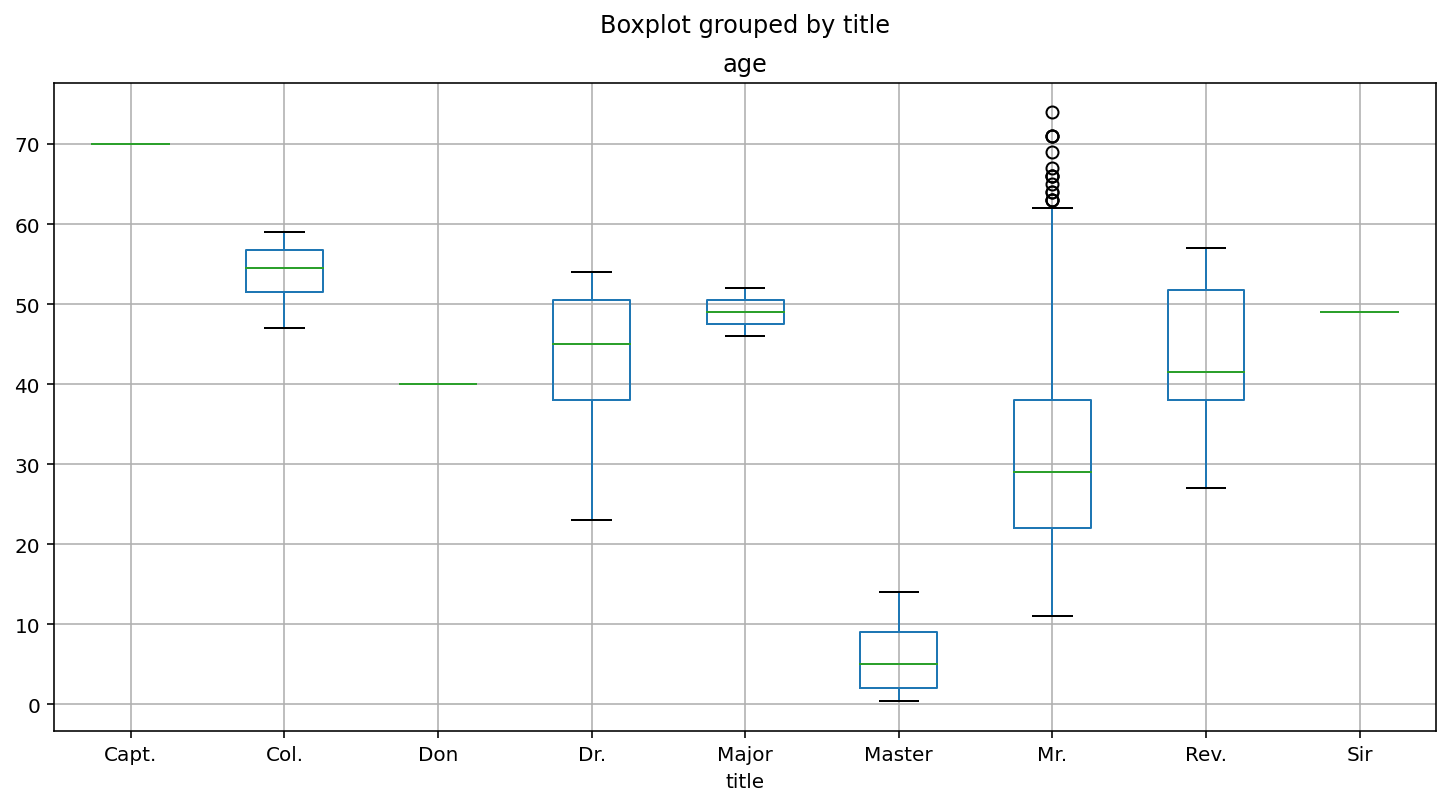

In [30]:
passengers[(passengers['sex'] == 'male')].boxplot('age','title')

<AxesSubplot:title={'center':'age'}, xlabel='title'>

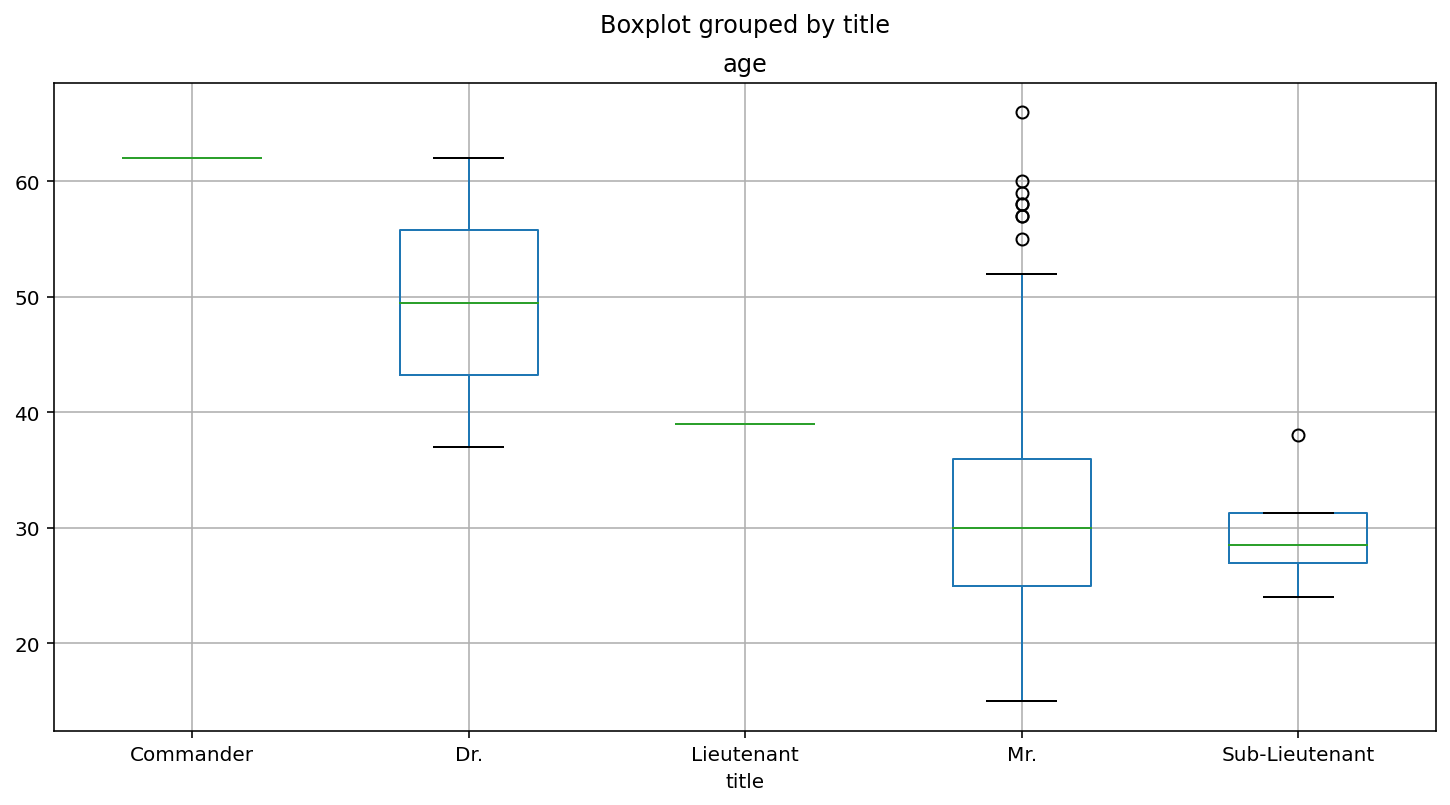

In [31]:
crew[(crew['sex'] == 'male')].boxplot('age','title')

**Q6** Existe-t-il un ensemble de titres pour laquelle une distinction entre enfant et adulte semble être le critère principal ?

Il semblerait que le titre 'Master' soit assigné aux enfants. Aucun adulte ne porte ce titre.

**Q7** Consulter les listes des *enfants* les plus âgés et des *adultes* les plus jeunes.

In [3]:
passengers_male = passengers[(passengers['sex'] == 'male')]
passengers_male = passengers_male[(passengers_male['age'].notnull())] # suppression des passagers dont l'age n'est pas renseigné

In [9]:
passengers_male[(passengers_male['title'] == 'Master')].sort_values('age', ascending=False).head(10)

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
1235,3,0,Master,Abbott,Eugene Joseph,male,14.0,1898-03-31,English,0,2,CA 2673,20.2500,NaN,S,NaN,NaN,"East Providence, RI"
860,3,0,Master,Asplund,Filip Oscar,male,13.0,1898-12-12,Swedish,4,2,347077,31.3875,NaN,S,NaN,NaN,"Sweden Worcester, MA"
1234,3,0,Master,Sage,William Henry,male,13.0,NaT,English,8,2,CA 2343,69.5500,NaN,S,NaN,67.0,NaN
285,1,1,Master,Ryerson,John Borie,male,13.0,1898-12-16,American,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
645,3,1,Master,Nicola-Yarred,Elias,male,12.0,1900-04-12,Syrian,1,0,2651,11.2417,NaN,C,C,NaN,NaN
1218,3,0,Master,Goodwin,William Frederick,male,11.0,NaT,English,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
880,3,0,Master,Skoog,Karl Thorsten,male,11.0,1900-07-13,Swedish,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
63,1,1,Master,Carter,William Thornton II,male,11.0,1900-09-14,American,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
1107,3,0,Master,Rice,Albert,male,10.0,NaT,Irish,4,1,382652,29.1250,NaN,Q,NaN,NaN,NaN
1194,3,0,Master,van Billiard,James William,male,10.0,1901-08-20,American,1,1,A/5 851,14.5000,NaN,S,NaN,NaN,NaN


In [10]:
passengers_male[(passengers_male['title'] != 'Master')].sort_values('age', ascending=True).head(10)

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
714,3,0,Mr.,Hassan,Houssein G N,male,11.0,NaT,Syrian,0,0,2699,18.7875,NaN,C,NaN,NaN,NaN
1148,3,1,Mr.,Svensson,Johan Cervin,male,14.0,1898-03-05,Swedish,0,0,7538,9.2250,NaN,S,13,NaN,NaN
339,2,0,Mr.,Sweet,George Frederick,male,14.0,1897-04-16,English,0,0,220845,65.0000,NaN,S,NaN,NaN,"Somerset / Bernardsville, NJ"
1211,3,0,Mr.,Goodwin,Charles Edward,male,14.0,NaT,English,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
815,3,0,Mr.,Vander Planke,Leo Edmondus,male,15.0,1896-09-17,Belgian,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
727,3,0,Mr.,Panula,Jaako Arnold,male,15.0,1897-02-08,Finnish,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN
665,3,0,Mr.,Samaan,Youssef,male,15.0,NaT,Syrian,2,0,2662,21.6792,NaN,C,NaN,NaN,NaN
709,3,0,Mr.,Elias,Tannous,male,15.0,NaT,Syrian,1,1,2695,7.2292,NaN,C,NaN,NaN,Syria
696,3,0,Mr.,Thomas,Tannous,male,16.0,NaT,Syrian,0,0,2684,7.2250,NaN,C,NaN,NaN,NaN
726,3,0,Mr.,Panula,Ernesti Arvid,male,16.0,1895-05-18,Finnish,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN


A première vue, le titre 'Master' est réservé aux hommes de 14 ans ou moins. Cependant, cette définition d'un enfant n'est pas suffisante car on remarque que certains passagers de 14 ans ou moins ont un autre titre que 'Master'. En particulier, on remarque qu'un passager de 11 ans, Syrien possède le titre 'Mr.'

## Classification automatique

Nous allons chercher à déterminer automatiquement les critères de *jeunesse* à l'aide d'un [arbre de décision](https://scikit-learn.org/stable/modules/tree.html) de la bibliothèque scikit-learn.

Dans une première version, la seule variable d'entrée du classificateur sera l'âge, et le label (ou la classe) de sortie sera binaire : enfant ou non. Il faudra donc extraire un tableau de la forme suivante (ou proche).

|      age | child |
|---------:|------:|
| 0.413699 | True  |
| 0.435616 | True  |
| 0.602740 | True  |
| ...      | ...   |
| 14       | False |
| 14       | True  |
| 15       | False |
| ...      | ...   |
| 71       | False |
| 74       | False |

**Q8** Donner une séquence d'instructions permettant d'aboutir à ce résultat.

In [4]:
df_age = pd.DataFrame(passengers_male.get(['age','title']).sort_values(by='age',ascending=True))
df_age['child'] = (df_age['title'] == 'Master')
df_age = df_age.get(['age','child'])
df_age

,age,child
866,0.413699,True
631,0.435616,True
1271,0.602740,True
500,0.830137,True
434,0.849315,True
...,...,...
320,70.000000,False
287,71.000000,False
293,71.000000,False
520,71.000000,False


In [21]:
df_age[(df_age['age'] == 14) | (df_age['age'] == 11)]

,age,child
880,11.0,True
1218,11.0,True
63,11.0,True
714,11.0,False
339,14.0,False
1148,14.0,False
1211,14.0,False
1235,14.0,True


On retrouve le cas du Syrien de 11 ans et l'imprecision pour les enfants de 14 ans

**Q9** Existe-t-il des valeurs manquantes ? Quelle stratégie souhaitez vous mettre en œuvre pour les traiter ?

Il existe des passagers dont l'âge n'est pas renseigné. J'ai décidé de les enlever de la DataFrame car il y a très peu de passagers dans ce cas là. J'ai effectué cette suppresion à la question 7

### Exemple guidé de classification automatique

Nous cherchons à générer un arbre de décision permettant de classer nos personnes en deux catégories : adulte ou enfant.  
Une première version considère uniquement l'âge comme donnée d'entrée.

In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(df_age[['age']], df_age['child'])

DecisionTreeClassifier()

Un des avantages des arbres de décision est que les règles de détermination de la sortie sont explicites, et il est possible de visualiser l'arbre (sous réserve qu'il ne soit pas trop profond, car l'ensemble devient vite illisible).  
Les fonctions [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) ou [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) affichent l'arbre des conditions qui ont été définies pour naviguer vers une branche, déterminant le résultat de la classification. 

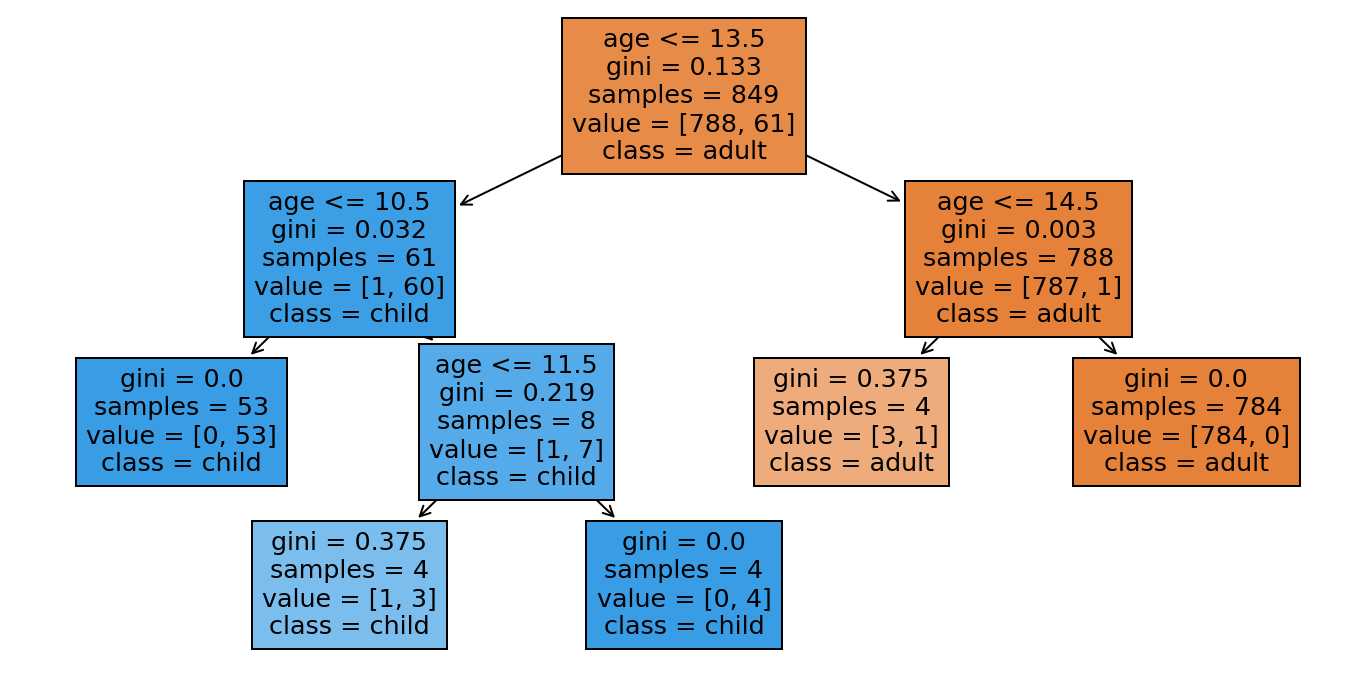

In [6]:
# visualisation avec plot_tree
tree.plot_tree(clf, feature_names=['age'], class_names=['adult', 'child'], filled=True);

In [7]:
# visualisation avec export_text
print(tree.export_text(clf, feature_names=['age']))

|--- age <= 13.50
|   |--- age <= 10.50
|   |   |--- class: True
|   |--- age >  10.50
|   |   |--- age <= 11.50
|   |   |   |--- class: True
|   |   |--- age >  11.50
|   |   |   |--- class: True
|--- age >  13.50
|   |--- age <= 14.50
|   |   |--- class: False
|   |--- age >  14.50
|   |   |--- class: False



Le classificateur ainsi entrainé peut être utilisé pour prédire le statut d'autres personnes (en particulier les femmes, pour lesquelles aucune information de référence n'existe), en [demandant le label](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) associé à une série d'entrées.

In [30]:
dummy_ages = pd.DataFrame({'age': np.arange(10, 16, 0.5)})
dummy_ages['child'] = clf.predict(dummy_ages)
dummy_ages

,age,child
0,10.0,True
1,10.5,True
2,11.0,True
3,11.5,True
4,12.0,True
5,12.5,True
6,13.0,True
7,13.5,True
8,14.0,False
9,14.5,False


In [31]:
known = passengers[passengers['age'].notnull()].copy()
known['child'] = clf.predict(known[['age']])
known

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest,child
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England",False
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN,False
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC",False
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.650,E67,S,NaN,NaN,"New York, NY",False
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",False
1313,3,0,Mr.,Ford,Edward Watson,male,18.0,NaT,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",False
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",True
1315,3,0,Mr.,Ford,William Neal,male,16.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",False


**Q10** La stratégie de gestion des valeurs manquante aurait-elle pu avoir un impact sur l'arbre généré ?

La suppression des lignes dont la valeur d'âge est manquante n'a pas d'impact sur l'arbre généré. Par contre, si par exemple l'âge manquant avait été rempli par un âge généré aléatoirement, on aurait pu avoir un cas d'une personne non 'Master' avec un âge très petit. Ceci aurait été une exception dans le modèle et dont aurait potentiellement pu modifier l'arbre. Si l'on remplace l'âge manquant par l'âge moyen ou median, il faut aussi faire attention qu'une personne dont l'âge est manquant ne soit pas 'Master', sinon on se retrouve avec aussi une exception. 

**Q11** Sur les passagers de sexe masculin, quel est la précision de la prédiction ? Auriez-vous pu prédire cette valeur ?

In [34]:
clf.score(df_age[['age']], df_age['child'])

0.9976442873969376

La précision est de quasiment 100% sur les hommes puisque celà correspond à notre set d'entraînement du model. La marge d'erreur vient sûrement du passager syrien et l'incertitude à 14 ans

**Q12** En considérant d'autres entrées que l'âge, pourrait-on améliorer la précision de la classification ? Est-ce souhaitable ?

On pourrait trouver d'autres critères pour gérer les dernières exceptions. Mais ce n'est sûrement pas souhaitable car le modèle de prédiction serait ensuite très apte à prédire cet échantillon là mais ferait plus d'erreurs sur des nouveaux échantillons (comme les femmes où il n'y a pas le titre Master). Le modèle devriendrait alors overfit et serait moins en mesure de généraliser ses prédictions à de nouveaux échantillons.

# Alors, survivant ou non ?

Pour cette dernière partie, vous pourrez, au choix et en fonction de votre avancement, travailler sur une seule des deux catégories de personnes (passagers ou membres d'équipage) ou bien, de préférence, manipuler les deux catégories sous un schéma commun.

## Préparation des données

Les algorithmes d'analyse ne sont parfois (voire même souvent) utilisables que pour des valeurs numériques. Ce sera le cas ici.  
Une première étape consiste donc à :

1. déterminer les informations pertinentes pour l'analyse,
2. convertir si nécessaire ces informations en valeurs numériques (booléennes, entières ou réelles).

### Représentation des catégories

Une variable catégorielle prend une valeur dans un ensemble fini de valeurs possibles.  
Pour ce type de variable, il n'existe pas, a priori, de relation d'ordre naturelle entre les éléments.

Une solution qui arrive naturellement est d'associer un entier à chaque catégorie, et de remplacer la valeur catégorielle par cet entier. Par exemple pour le port d'embarquement, il serait possible de les numéroter de 1 à 4.  
Néanmoins, les algorithmes d'analyse se basent généralement sur l'ordre naturellement associé aux valeurs numériques. Or celui-ci pourrait être arbitraire et introduire des erreurs dans l'analyse.

Sur l'exemple des ports d'embarquement, un ordre pertinent peut tout de même être défini à partir du trajet du Titanic, qui est parti de Belfast (1) avant de faire escale à Southampton (2), Cherbourg (3) puis Queenstown (4). Ce n'est pas le cas pour toutes les données catégorielles.

Une technique plus appropriée en général est de convertir les catégories en autant de colonnes binaires, par exemple `boarded_B`, `boarded_C`, `boarded_Q` et `boarded_S`. La fonction [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) permet de réaliser ce type de transformation.  
Pour les catégories n'ayant que deux valeurs distinctes (le sexe par exemple), celles-ci peuvent directement être converties en booléens.

**Q13** Parmi les informations fournies sur les personnes à bord du Titanic, lesquelles correspondent à des données catégorielles, et combien de valeurs distinctes possèdent-elles ?

Je choisis de travailler sur les données des passagers.

In [37]:
passengers.columns

Index(['class', 'survived', 'title', 'surname', 'first name', 'sex', 'age',
       'birthday', 'nationality', 'sibsp', 'parch', 'ticket', 'fare', 'cabin',
       'boarded', 'lifeboat', 'body', 'home.dest'],
      dtype='object')

In [8]:
passengers

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC"
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.650,E67,S,NaN,NaN,"New York, NY"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1313,3,0,Mr.,Ford,Edward Watson,male,18.0,NaT,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1315,3,0,Mr.,Ford,William Neal,male,16.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


In [13]:
passengers.groupby('nationality')['nationality'].agg(['count'])

,count
nationality,
American,267
Argentinian,4
Australian,1
Austrian,6
Belgian,31
Bosnian,4
Bulgarian,31
Canadian,28
Croatian,28


Les colonnes de données catégorielles sont :
    - class = {1,2,3}
    - survived = {0,1}
    - title = {Capt., Col., Don, Dr., Major, Master, Mr., Rev., Sir}
    - sex = {male,female}
    - nationality = {voir ci-dessus}
    - boarded = {Belfast, Southampton, Cherbourg, Queenstown}
    - lifeboat

**Q14** Définir et transformer votre ou vos DataFrame(s) afin de ne conserver que des données numériques pertinentes pour l'analyse de la survie des personnes à bord.

**Q15** Générer et visualiser un arbre de décision permettant de déterminer si une personne a survécu ou non.

## Classification et validation

L'objectif de cette partie est d'évaluer la qualité de l'arbre de décision pour déterminer la survie d'une personne pour laquelle la vérité de terrain ne serait pas connue.

Pour cela, le jeu de données doit être [découpé en deux](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) :

- une partie servant à l'entraînement du modèle (on parle de jeu d'entraînement),
- une partie servant à le valider (on parle de jeu de test ou de validation) pour en estimer la qualité.

La validation consiste alors à [quantifier le ratio](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) de personnes dont l'issue a été correctement prédite par le modèle sur le jeu de test.

**Q16** Calculer la précision du modèle sur le jeu de test et sur le jeu d'entraînement, puis observer l'impact de paramètres tels que la profondeur maximale de l'arbre sur ces deux précisions.